In [2]:
import numpy as np
import matplotlib.pyplot as plt

from create_prepared_data_tsfresh import *
from compression import calculateCompRatio, compress_dataset
from utils.personal_utils import *

import os
import pywt

import matplotlib.pyplot as plt
import time

In [19]:
all_ds = {
    'AppliancesEnergy':   '/home/sim/Desktop/TS Extrinsic Regression/data/AppliancesEnergy_TRAIN.ts',
    'NewsTitleSentiment': '/home/sim/Desktop/TS Extrinsic Regression/data/NewsTitleSentiment_TRAIN.ts',
    'BenzeneConcentration':'/home/sim/Desktop/TS Extrinsic Regression/data/BenzeneConcentration_TRAIN.ts',
    'BeijingPM25Quality': '/home/sim/Desktop/TS Extrinsic Regression/data/BeijingPM25Quality_TRAIN.ts',

    'IEEEPPG':            '/home/sim/Desktop/TS Extrinsic Regression/data/IEEEPPG_TRAIN.ts',
    'FloodModeling1':     '/home/sim/Desktop/TS Extrinsic Regression/data/FloodModeling1_TRAIN.ts',
    'HouseholdPowerConsumption1': '/home/sim/Desktop/TS Extrinsic Regression/data/HouseholdPowerConsumption1_TRAIN.ts',
    'Covid3Month':              '/home/sim/Desktop/TS Extrinsic Regression/data/Covid3Month_TRAIN.ts'
}

In [3]:
""" # Save all y values
for ds_name, ds_path in all_ds.items():
    ds_array, y = load_dataset(ds_path)
    filepath = os.path.join('/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays', ds_name + "_y")
    np.save(filepath, y) """

' for ds_name, ds_path in all_ds.items():\n    ds_array, y = load_dataset(ds_path)\n    filepath = os.path.join(\'/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays\', ds_name + "_y")\n    np.save(filepath, y) '

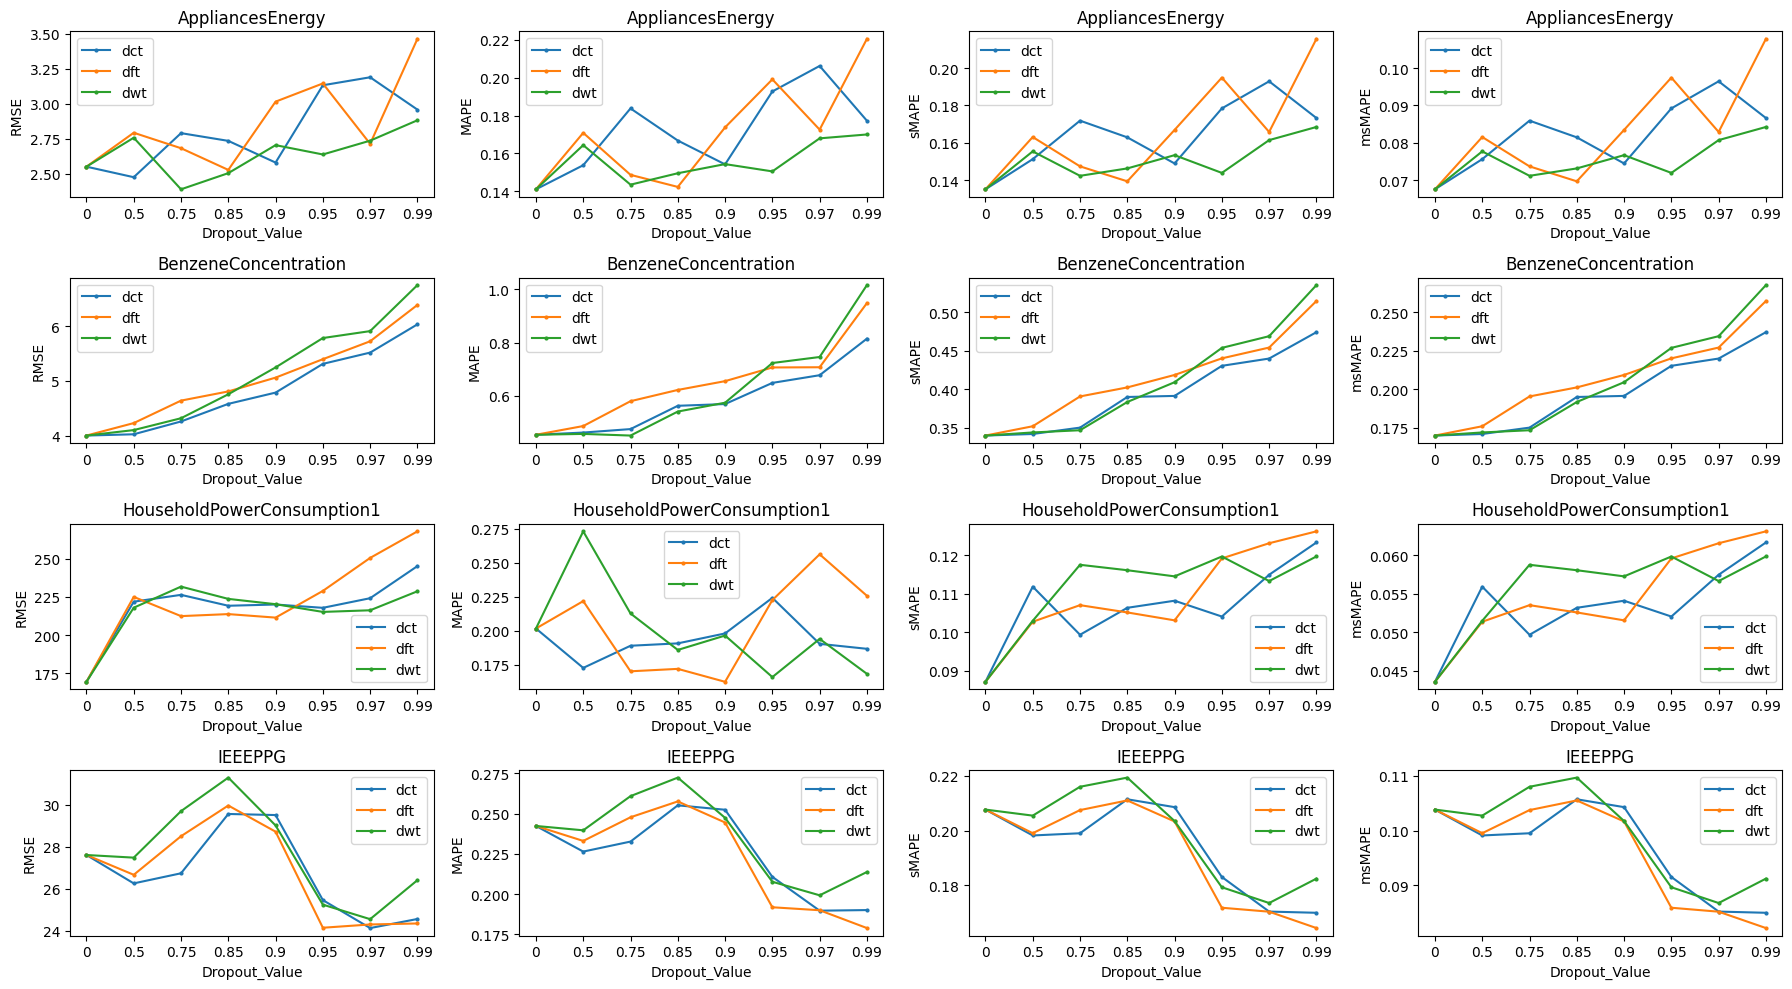

In [3]:
# Plot CDropout_Value against the metrics

path = '/home/sim/Desktop/TS Extrinsic Regression/PredictionsAllDatasets/'
dropout_values = [0, 0.5, 0.75, 0.85, 0.9, 0.95, 0.97, 0.99]
tqs = ['dct', 'dft', 'dwt']

ds_names = [
            'AppliancesEnergy', 
            'BenzeneConcentration',
            'HouseholdPowerConsumption1',
            'IEEEPPG',
            ]



custom_x_ticks = np.arange(len(dropout_values))
plt.figure(figsize=(18, 10))  

num_dataset = len(ds_names)

for subplot_id, ds_name in enumerate(ds_names):

    dataset_array = np.load('/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays/' + ds_name + '_TRAIN.npy')
    y = np.load(f'/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays/{ds_name}_y.npy')


    for tq in tqs:
        comp_ratios = np.empty_like(dropout_values)
        rmse = np.empty_like(dropout_values)
        mape = np.empty_like(dropout_values)
        smape = np.empty_like(dropout_values)
        msmape = np.empty_like(dropout_values)


        for i, dropout in enumerate(dropout_values):
            if dropout == 0:
                prediction =  np.load(path + ds_name + '/' + f"NONE_{ds_name}_predictions.npy")

            else:
                prediction = np.load(path + ds_name + '/' + f"{dropout}_{tq}_{ds_name}_predictions.npy")
            rmse[i] = get_rmse(y, prediction)
            mape[i] = get_mape(y, prediction)
            smape[i] = get_smape(y, prediction)
            msmape[i] = get_msmape(y, prediction)

                #comp_ratios[i] = calculateCompRatio(dataset_array, compress_dataset(dataset_array.copy(), ds_name, andDecompress= False, compression_type= tq, compression_param=dropout))
                


        # comp_ratios = np.arange(len(dropout_values))



        plt.subplot(num_dataset,4,subplot_id * num_dataset + 1)
        plt.plot(custom_x_ticks, rmse, label=f"{tq}", marker= 'o', markersize = 2)
        plt.xlabel("Dropout_Value")
        plt.ylabel("RMSE")
        plt.legend()
        plt.title(f'{ds_name}')
        plt.xticks(custom_x_ticks, dropout_values)

        plt.subplot(num_dataset,4,subplot_id * num_dataset + 2)
        plt.plot(custom_x_ticks, mape, label=f"{tq}", marker= 'o', markersize = 2)
        plt.xlabel("Dropout_Value")
        plt.ylabel("MAPE")
        plt.legend()
        plt.title(f'{ds_name}')
        plt.xticks(custom_x_ticks, dropout_values)

        plt.subplot(num_dataset,4,subplot_id * num_dataset + 3)
        plt.plot(custom_x_ticks, smape, label=f"{tq}", marker= 'o', markersize = 2)
        plt.xlabel("Dropout_Value")
        plt.ylabel("sMAPE")  
        plt.legend()          
        plt.title(f'{ds_name}')               
        plt.xticks(custom_x_ticks, dropout_values)


        plt.subplot(num_dataset,4,subplot_id * num_dataset + 4)
        plt.plot(custom_x_ticks, msmape, label=f"{tq}", marker= 'o', markersize = 2)
        plt.xlabel("Dropout_Value")
        plt.ylabel("msMAPE")  
        plt.legend()          
        plt.title(f'{ds_name}')   
        plt.xticks(custom_x_ticks, dropout_values)

plt.tight_layout()

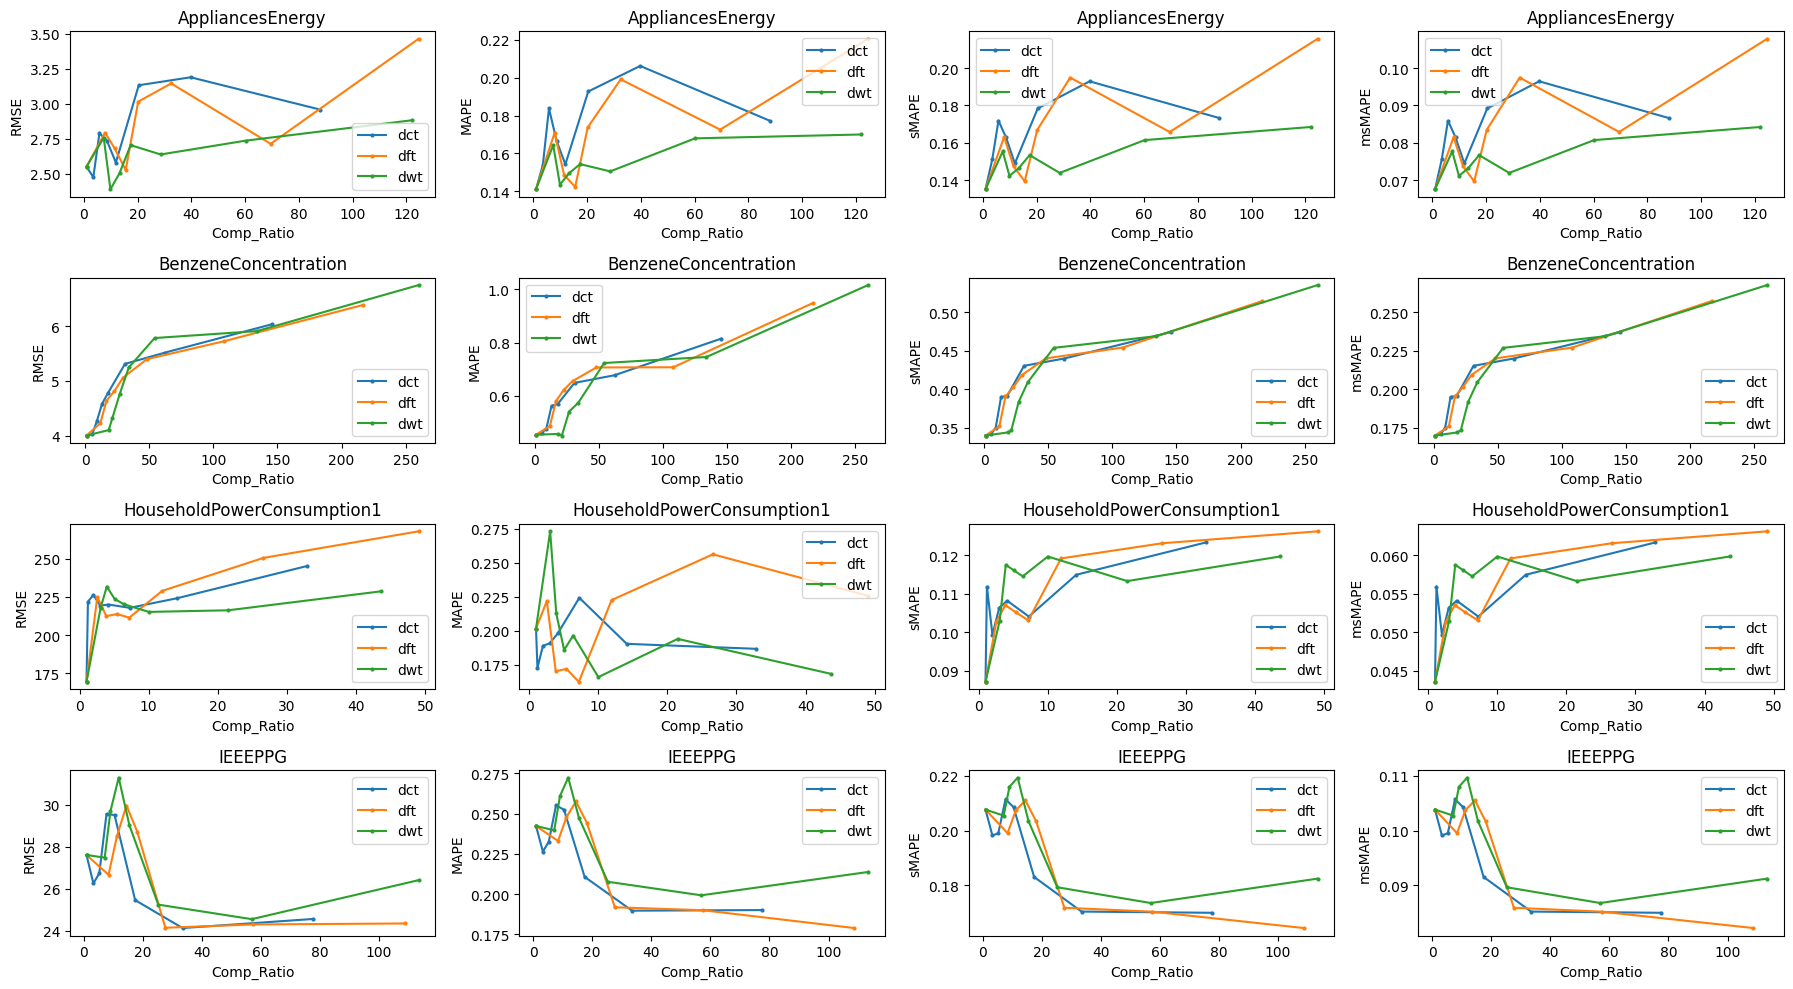

In [37]:
# Plot Comp_Ratio against the metric #> 6mins

path = '/home/sim/Desktop/TS Extrinsic Regression/PredictionsAllDatasets/'
dropout_values = [0, 0.5, 0.75, 0.85, 0.9, 0.95, 0.97, 0.99]

tqs = ['dct', 'dft', 'dwt']

ds_names = [
            'AppliancesEnergy', 
            'BenzeneConcentration',
            'HouseholdPowerConsumption1',
            'IEEEPPG',
            ]


plt.figure(figsize=(18, 10))  

num_dataset = len(ds_names)

for subplot_id, ds_name in enumerate(ds_names):

    dataset_array = np.load('/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays/' + ds_name + '_TRAIN.npy')
    y = np.load(f'/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays/{ds_name}_y.npy')


    for tq in tqs:
        comp_ratios = np.empty_like(dropout_values)
        rmse = np.empty_like(dropout_values)
        mape = np.empty_like(dropout_values)
        smape = np.empty_like(dropout_values)
        msmape = np.empty_like(dropout_values)


        for i, dropout in enumerate(dropout_values):
            if dropout == 0:
                prediction =  np.load(path + ds_name + '/' + f"NONE_{ds_name}_predictions.npy")
                comp_ratios[i] = 1 # No Compression, so Comp-Ratio of 1

            else:
                prediction = np.load(path + ds_name + '/' + f"{dropout}_{tq}_{ds_name}_predictions.npy")
                
            rmse[i] = get_rmse(y, prediction)
            mape[i] = get_mape(y, prediction)
            smape[i] = get_smape(y, prediction)
            msmape[i] = get_msmape(y, prediction)


            # This is the time consuming step!
            if dropout != 0:
                comp_ratios[i] = calculateCompRatio(dataset_array, compress_dataset(dataset_array.copy(), ds_name, andDecompress= False, compression_type= tq, compression_param=dropout))
                



        plt.subplot(num_dataset,4,subplot_id * num_dataset + 1)
        plt.plot(comp_ratios, rmse, label=f"{tq}", marker= 'o', markersize = 2)
        plt.xlabel("Comp_Ratio")
        plt.ylabel("RMSE")
        plt.legend()
        plt.title(f'{ds_name}')

        plt.subplot(num_dataset,4,subplot_id * num_dataset + 2)
        plt.plot(comp_ratios, mape, label=f"{tq}", marker= 'o', markersize = 2)
        plt.xlabel("Comp_Ratio")
        plt.ylabel("MAPE")
        plt.legend()
        plt.title(f'{ds_name}')

        plt.subplot(num_dataset,4,subplot_id * num_dataset + 3)
        plt.plot(comp_ratios, smape, label=f"{tq}", marker= 'o', markersize = 2)
        plt.xlabel("Comp_Ratio")
        plt.ylabel("sMAPE")  
        plt.legend()          
        plt.title(f'{ds_name}')               



        plt.subplot(num_dataset,4,subplot_id * num_dataset + 4)
        plt.plot(comp_ratios, msmape, label=f"{tq}", marker= 'o', markersize = 2)
        plt.xlabel("Comp_Ratio")
        plt.ylabel("msMAPE")  
        plt.legend()          
        plt.title(f'{ds_name}')   
        


plt.tight_layout()

        



In [23]:
tsandf, features = load_and_prepare_everything(all_ds['AppliancesEnergy'], 'dct', 0.5)

119it [00:02, 45.86it/s]
Feature Extraction: 100%|██████████| 30/30 [00:22<00:00,  1.34it/s]


How to analyse the selected features? Still 1000 featurs. What to look for? How to understand single feature names?
Columns with initally Nan are 0, will not be selected for sure.
How to automate analysis? Can't look at 18000 featurs myself.
Other we have around 6000 features and select around 3000.


In [34]:

import re
def extract_fifth_number(column_name):
    match = re.match(r'^.{4}(\d+)', column_name)  # Match numbers after the first 4 characters
    if match:
        return int(match.group(1))
    return float('inf')  # Use infinity for columns without a valid number

# Create a dictionary with column names as keys and extracted numbers as values
column_sort_order = {col: extract_fifth_number(col) for col in features.columns}

# Sort columns based on the extracted numbers
sorted_columns = sorted(column_sort_order, key=column_sort_order.get)

# Reorder the DataFrame columns
features_sorted = features[sorted_columns]
features_sorted

,dim_1__variance_larger_than_standard_deviation,dim_1__has_duplicate_max,dim_1__has_duplicate_min,dim_1__has_duplicate,dim_1__sum_values,dim_1__abs_energy,dim_1__mean_abs_change,dim_1__mean_change,dim_1__mean_second_derivative_central,dim_1__median,...,dim_24__fourier_entropy__bins_10,dim_24__fourier_entropy__bins_100,dim_24__permutation_entropy__dimension_3__tau_1,dim_24__permutation_entropy__dimension_4__tau_1,dim_24__permutation_entropy__dimension_5__tau_1,dim_24__permutation_entropy__dimension_6__tau_1,dim_24__permutation_entropy__dimension_7__tau_1,dim_24__query_similarity_count__query_None__threshold_0.0,dim_24__mean_n_absolute_max__number_of_maxima_7,target
0,1.0,0.0,0.0,0.0,0.030129,144.171555,0.053482,0.003926,-0.000020,-0.181655,...,0.197570,0.359959,1.356889,2.017574,2.645180,3.193317,3.690775,0.0,1.893476,19.38
1,0.0,0.0,0.0,0.0,0.070039,143.752557,0.060102,-0.007028,-0.000086,-0.269548,...,0.144565,0.393377,1.490605,2.169506,2.704489,3.199043,3.635333,0.0,1.735224,12.68
2,0.0,0.0,0.0,0.0,-0.055389,143.549553,0.049657,-0.017667,0.000615,-0.281585,...,0.144565,0.359959,1.656047,2.615860,3.397440,3.882123,4.220529,0.0,2.020656,5.34
3,0.0,0.0,0.0,0.0,-0.102545,143.626298,0.065301,0.018032,-0.000291,-0.169591,...,0.216560,0.216560,1.430972,2.147072,2.736767,3.182333,3.545052,0.0,1.684670,12.72
4,1.0,0.0,0.0,0.0,-0.024506,144.195081,0.049881,-0.007979,-0.000085,-0.155485,...,0.216560,0.359959,1.518376,2.202989,2.730881,3.127549,3.446732,0.0,2.295439,13.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.0,0.0,0.0,0.0,0.197303,143.692474,0.082391,0.001954,0.001743,-0.077312,...,0.197570,0.216560,1.438536,2.202767,2.828864,3.248842,3.540016,0.0,1.961003,14.71
91,0.0,0.0,0.0,0.0,-0.048036,143.830875,0.056887,0.007741,-0.000431,-0.107052,...,0.288359,0.483562,1.401238,2.105678,2.718789,3.247124,3.683607,0.0,1.873215,13.69
92,1.0,0.0,0.0,0.0,0.074534,144.055532,0.045370,-0.009928,0.000825,-0.189990,...,0.144565,0.457404,1.312840,1.986927,2.580288,3.011074,3.379185,0.0,2.316813,13.87
93,0.0,0.0,0.0,0.0,-0.068987,143.908933,0.069063,0.012539,-0.000115,-0.014112,...,0.359959,0.573539,1.202433,1.658048,2.066516,2.433053,2.790401,0.0,2.256027,17.66


In [36]:
file_path = '/home/sim/Desktop/TS Extrinsic Regression/0.5_dct_AppliancesEnergy_20min_Flaml_f/selected_features.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

lines = [line.strip() for line in lines]

selected_features = features[lines]


column_sort_order = {col: extract_fifth_number(col) for col in selected_features.columns}

# Sort columns based on the extracted numbers
sorted_columns = sorted(column_sort_order, key=column_sort_order.get)

# Reorder the DataFrame columns
sfeatures_sorted = selected_features[sorted_columns]
sfeatures_sorted

,dim_1__fft_coefficient__attr_real__coeff_54,dim_1__agg_linear_trend__attr_slope__chunk_len_50__f_agg_var,dim_1__fft_coefficient__attr_angle__coeff_55,dim_1__agg_linear_trend__attr_rvalue__chunk_len_50__f_agg_max,dim_1__fft_coefficient__attr_real__coeff_10,dim_1__fft_coefficient__attr_imag__coeff_30,dim_1__friedrich_coefficients__coeff_2__m_3__r_30,dim_1__fft_coefficient__attr_angle__coeff_18,dim_1__fft_coefficient__attr_angle__coeff_11,dim_1__ar_coefficient__coeff_4__k_10,...,dim_24__fft_coefficient__attr_angle__coeff_9,dim_24__autocorrelation__lag_2,dim_24__change_quantiles__f_agg_var__isabs_True__qh_1.0__ql_0.8,dim_24__kurtosis,dim_24__change_quantiles__f_agg_var__isabs_False__qh_1.0__ql_0.6,dim_24__fft_coefficient__attr_real__coeff_9,dim_24__cwt_coefficients__coeff_13__w_2__widths_(2 5 10 20),dim_24__abs_energy,dim_24__fft_coefficient__attr_abs__coeff_66,dim_24__agg_linear_trend__attr_intercept__chunk_len_10__f_agg_var
0,0.156626,0.600406,100.892866,0.247173,-1.260077,0.478149,-0.001483,111.175615,65.082276,-0.168497,...,5.290219,0.981040,0.001089,-0.834957,0.007414,0.925968,0.204903,143.972744,0.269521,0.009670
1,0.513801,-0.055231,-99.392647,-0.997455,2.197962,-0.638151,0.002013,-78.162471,-12.287728,-0.071866,...,-140.879038,1.000255,0.002885,-1.403646,0.004978,-0.725611,0.034512,144.128178,0.143881,0.022109
2,0.940263,-0.152099,-26.578071,-0.964726,2.192180,-1.352877,-0.019996,-40.104958,-67.892272,-0.361863,...,59.635098,0.979068,0.004171,-0.624916,0.005247,1.591491,-0.347373,144.392614,1.059552,0.024537
3,-1.653940,0.478783,154.010074,0.454243,-2.955888,1.789823,0.012876,114.000213,109.649353,-0.007616,...,90.808337,0.991840,0.000562,-1.512424,0.004309,-0.047917,-0.007490,143.813904,0.426118,0.064666
4,0.160933,0.064371,-6.429819,-0.948230,0.515984,-0.553009,-0.007138,-12.974975,-75.019189,0.124707,...,106.529598,0.967575,0.009351,-0.427642,0.008709,-2.162029,0.166171,142.408118,0.452589,0.004455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.152326,0.276977,-53.278456,-0.335404,-0.333584,0.291328,0.018697,90.472273,81.779086,0.129179,...,113.247055,0.984654,0.001155,-0.536596,0.001851,-2.469247,0.029226,144.023734,0.897189,0.004539
91,0.088679,0.398727,-158.022950,0.514211,0.674679,0.508203,0.030849,175.267841,100.803033,0.040584,...,-45.868069,0.976471,0.001539,-1.287492,0.007731,5.418900,0.009268,143.685469,0.799995,0.036925
92,0.680078,-0.038929,-8.848225,-0.993408,1.433529,-1.077931,0.007233,-39.281501,-72.937957,-0.125048,...,-152.600924,0.963897,0.013362,-0.218809,0.025028,-5.041996,-0.036159,143.871190,0.321591,-0.008010
93,-0.776863,0.014252,136.768366,-0.862088,-0.173653,0.377408,0.006801,119.648463,62.724579,-0.153189,...,122.257420,0.978218,0.002839,0.355987,0.017445,-2.893243,-0.156202,144.061625,0.620969,0.026779
